In [2]:
import torch
import torch.nn.functional as F
from skimage.filters import rank
from skimage.morphology import disk
from torchvision.transforms.functional import normalize
import os.path as osp
import analysis
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from math import exp
import inspect
import os
from analysis.noise_filtering import median_filter, bilateral_filter, wiener_filter, mean_filter, gaussian_filter, \
    anisotropic_diffusion

In [3]:
img_dir = osp.join(osp.dirname(analysis.__file__), 'plots', 'imgs_labels')

In [4]:
img_small_0_0 = torch.from_numpy(tifffile.imread(osp.join(img_dir, '0-0.tif')))
img_big_0_0 = torch.from_numpy(tifffile.imread(osp.join(img_dir, '0-0-2.tif')))
img_small_4_0 = torch.from_numpy(tifffile.imread(osp.join(img_dir, '4-0-2.tif')))
img_big_4_0 = torch.from_numpy(tifffile.imread(osp.join(img_dir, '4-0-9.tif')))

In [5]:
def plot_imgs(original, filtered):
    fig, axes = plt.subplots(1, 2)

    # Plot the first tensor in the first subplot
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('original')

    # Plot the second tensor in the second subplot
    axes[1].imshow(filtered, cmap='gray')
    axes[1].set_title('filtered')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

In [6]:
# def median_filter(image, kernel_size):
# def mean_filter(image, kernel_size):
# def bilateral_filter(image, windows_size):
# def wiener_filter(image, kernel, noise_power):
# def gaussian_filter(image, sigma):
# def anisotropic_diffusion(image, niter=10, kappa=50, gamma=0.1):

In [7]:
print(median_filter(img_small_0_0, 5).shape)
print(mean_filter(img_small_0_0, 5).shape)
print(bilateral_filter(img_small_0_0, 5).shape)
print(wiener_filter(img_small_0_0, torch.ones((3, 3)) / 9, 0.1).shape)
print(gaussian_filter(img_small_0_0, 0.5).shape)
print(anisotropic_diffusion(img_small_0_0).shape)

median_filter_lambda = (lambda x: median_filter(x, 5))
mean_filter_lambda = (lambda x: mean_filter(x, 5))
bilateral_filter_lambda = (lambda x: bilateral_filter(x, 5))
wiener_filter_lambda = (lambda x: wiener_filter(x, torch.ones((5, 5)) / 9, 0.1))
gaussian_filter_lambda = (lambda x: gaussian_filter(x, 3))
anisotropic_diffusion_lambda = (lambda x: anisotropic_diffusion(x, niter=5, kappa=50, gamma=0.1))

all_filters = [median_filter_lambda, mean_filter_lambda, bilateral_filter_lambda, wiener_filter_lambda, gaussian_filter_lambda, anisotropic_diffusion_lambda]

torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])
torch.Size([1, 512, 512])


C:\Users\Team Epoch A\Documents\Epoch III\CTImageQuality\analysis\noise_filtering.py:125: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image_tensor = torch.tensor(image, dtype=torch.float32)
C:\Users\Team Epoch A\Documents\Epoch III\CTImageQuality\venv\lib\site-packages\torch\autograd\__init__.py:200: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ..\torch\csrc\autograd\engine.cpp:1156.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


median_filter_lambda = (lambda x: median_filter(x, 5))

torch.Size([1, 512, 512])


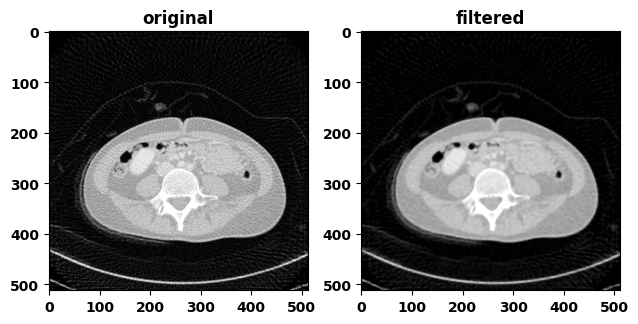

mean_filter_lambda = (lambda x: mean_filter(x, 5))



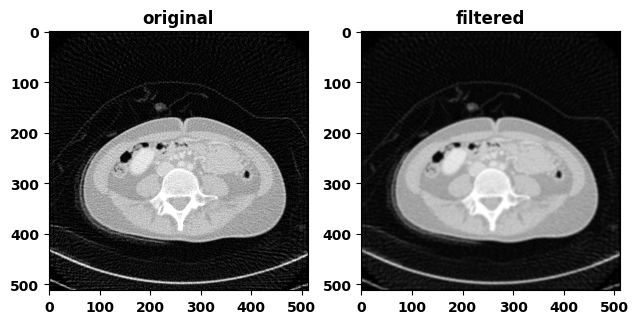

bilateral_filter_lambda = (lambda x: bilateral_filter(x, 5))



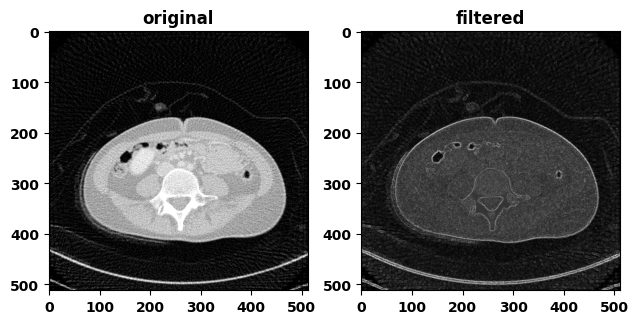

wiener_filter_lambda = (lambda x: wiener_filter(x, torch.ones((5, 5)) / 9, 0.1))



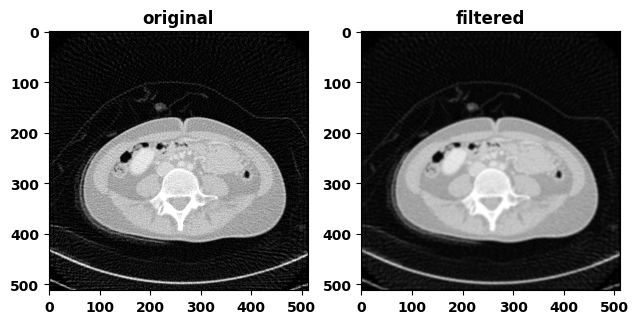

gaussian_filter_lambda = (lambda x: gaussian_filter(x, 3))



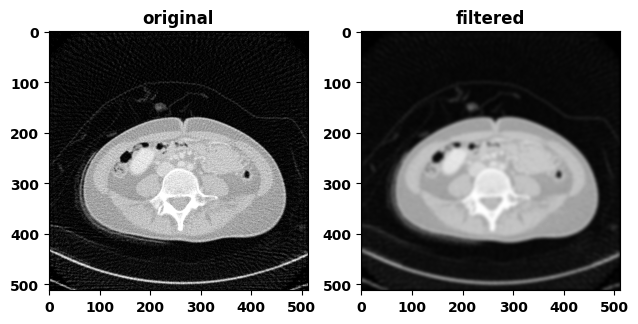

anisotropic_diffusion_lambda = (lambda x: anisotropic_diffusion(x, niter=5, kappa=50, gamma=0.1))



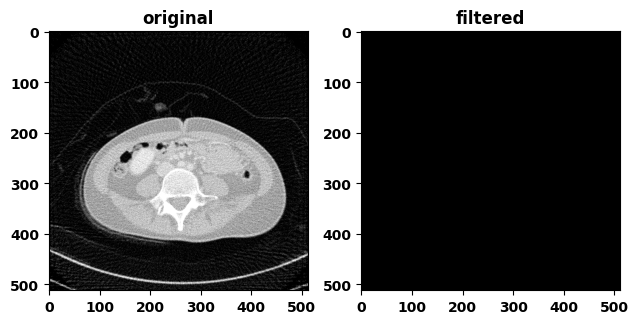

median_filter_lambda = (lambda x: median_filter(x, 5))

torch.Size([1, 512, 512])


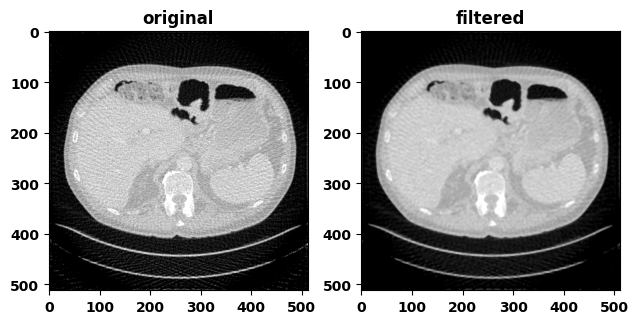

mean_filter_lambda = (lambda x: mean_filter(x, 5))



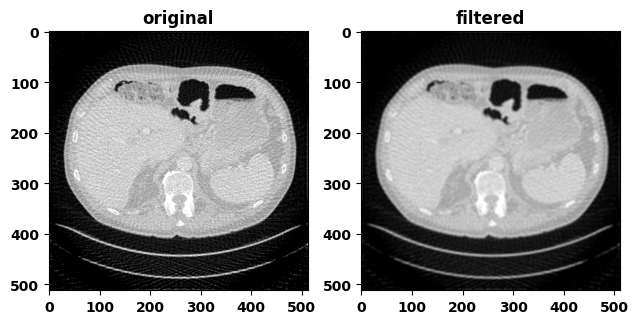

bilateral_filter_lambda = (lambda x: bilateral_filter(x, 5))



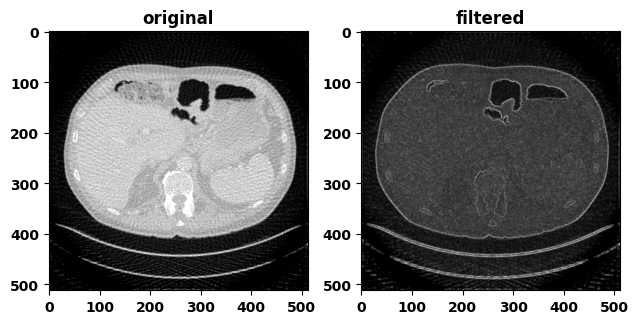

wiener_filter_lambda = (lambda x: wiener_filter(x, torch.ones((5, 5)) / 9, 0.1))



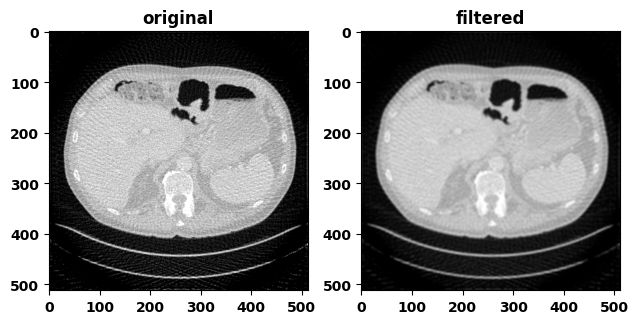

gaussian_filter_lambda = (lambda x: gaussian_filter(x, 3))



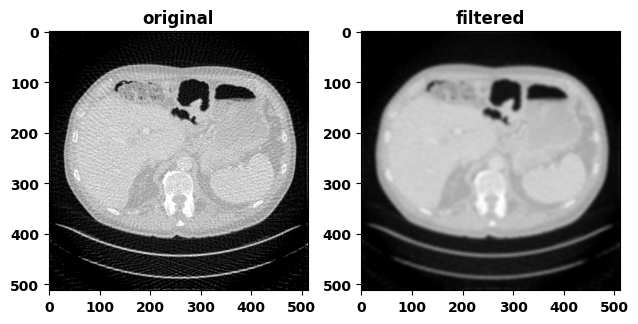

anisotropic_diffusion_lambda = (lambda x: anisotropic_diffusion(x, niter=5, kappa=50, gamma=0.1))



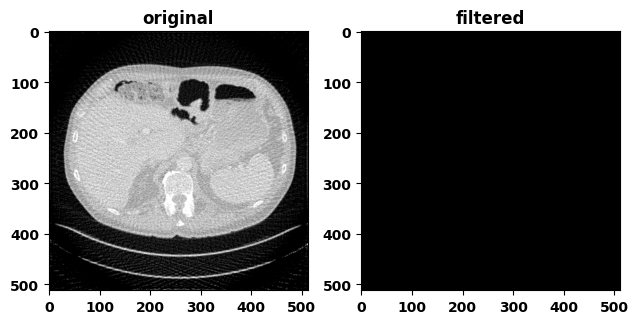

In [9]:
for img in [img_small_0_0, img_big_0_0]: # , img_small_4_0, img_big_4_0]:
    for filter in all_filters:
        print(inspect.getsource(filter))
        plot_imgs(img.squeeze(), filter(img).squeeze())

torch.Size([1, 512, 512])


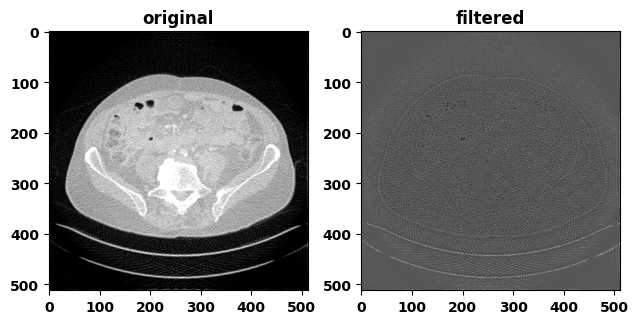

torch.Size([1, 512, 512])


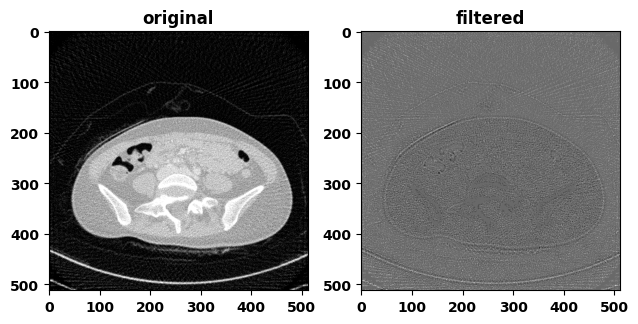

torch.Size([1, 512, 512])


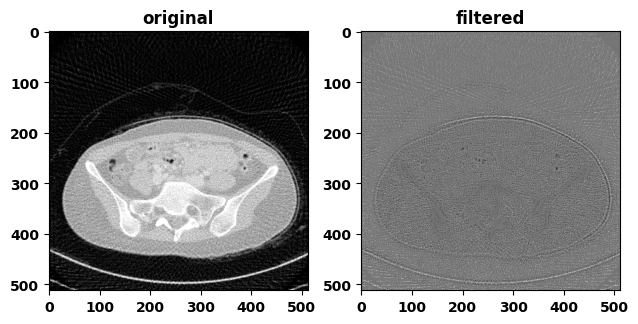

torch.Size([1, 512, 512])


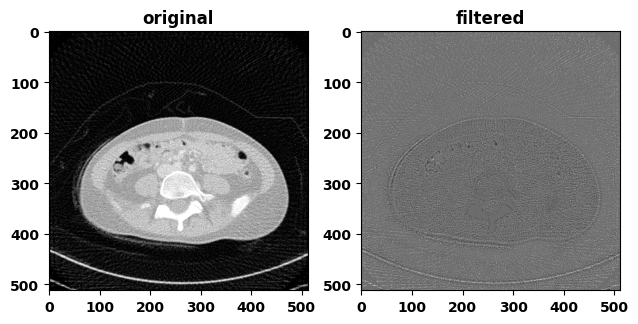

torch.Size([1, 512, 512])


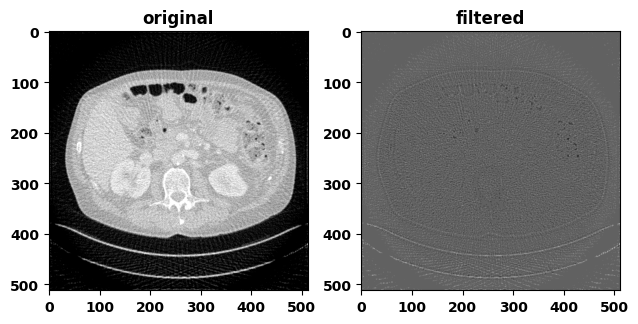

torch.Size([1, 512, 512])


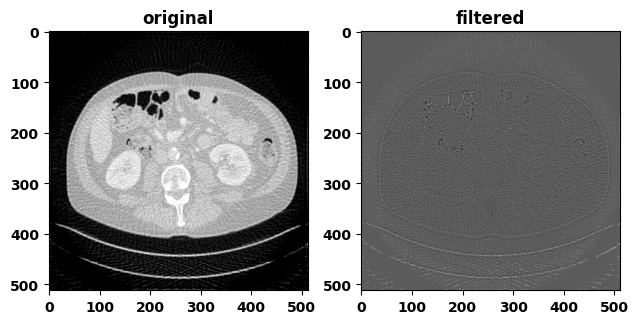

torch.Size([1, 512, 512])


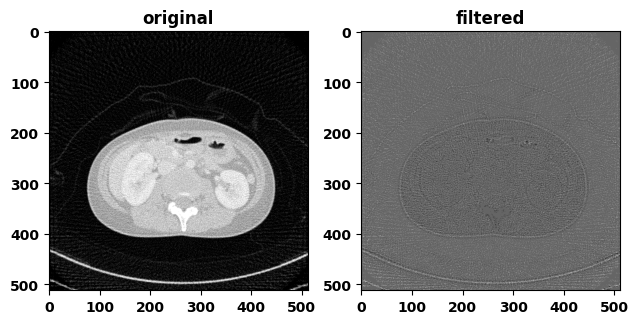

torch.Size([1, 512, 512])


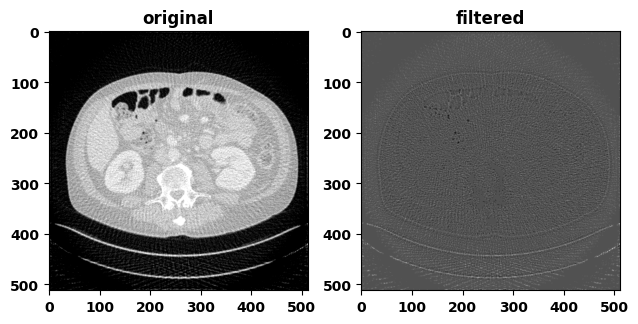

torch.Size([1, 512, 512])


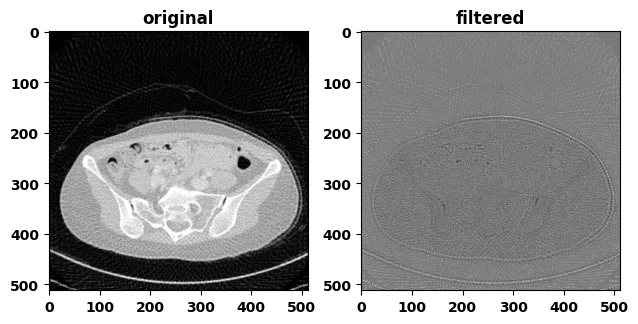

torch.Size([1, 512, 512])


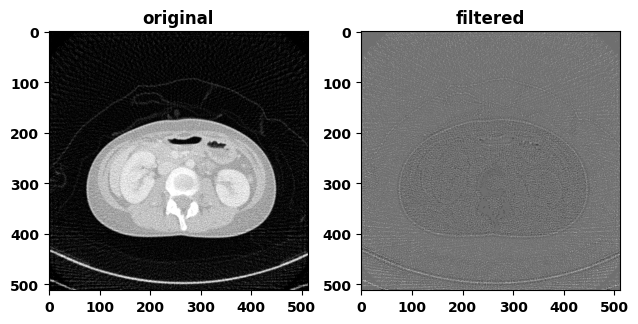

In [12]:
# img_names = sorted(os.listdir(img_dir))[-10:]
img_names = sorted(os.listdir(img_dir))[:10]

for img_name in img_names:
    original = torch.from_numpy(tifffile.imread(osp.join(img_dir, img_name)))
    plot_imgs(original.squeeze(), (original - median_filter_lambda(original)).squeeze())